# The script does next:

### Open file $\to$ rotate $\to$ crop $\to$ preob $\to$ peaks $\to$ characteristic curve 

# Libraries

In [2]:
#VERSIONS OF LIBRARIES!!!!
#HOW OPEN ANACONDA

import numpy as np ###v1.20.3
import astropy###v4.3.1
from astropy.io import fits
import matplotlib.pyplot as plt###v3.4.3
import cv2 #!pip3 install opencv-python ###v4.5.5
from scipy import signal ### v1.7.1
from scipy.signal import find_peaks
from astropy.io import fits
from PIL import Image###v8.4.0
from skimage import io, color###V0.18.3
import math
from tkinter import *

In [3]:
from PyQt5.QtGui import QImage, QPixmap

# Open txt files

Open file $\to$ make a list with data $\to$ make an array from list

In [3]:
# file_call1 = '/home/adel/Dropbox/QC2Python(spectrums)/Files/call1.txt'
file_call1 = 'Files/call1.txt'

data_call1 = [] #to work with data from txt file we should write it in array, so here we create an empty list
with open(file_call1) as file:
    next(file)
    for line in file:
        row = line.split()
        row = [int(x) for x in row]
        data_call1.append(row) #add data from txt the list

In [48]:
data_fits = fits.open("test_rewrite_2.fits")[0].data

In [72]:
data_fits[::-1]

array([[28292, 28909, 28217, ..., 27823, 28351, 28591],
       [27452, 28349, 28556, ..., 28224, 28379, 29097],
       [28180, 27896, 27852, ..., 28074, 28314, 28947],
       ...,
       [27866, 27878, 27915, ..., 27994, 28596, 28303],
       [28203, 27937, 28067, ..., 28366, 28167, 27454],
       [28277, 28154, 27841, ..., 27210, 27034, 27054]])

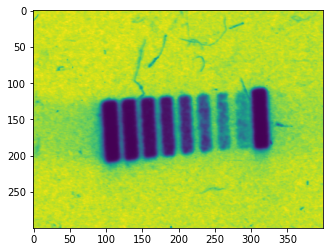

In [73]:
^^plt.imshow(data_fits[::-1])

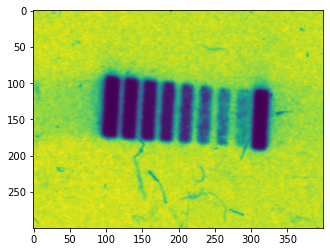

In [74]:
plt.imshow(data_fits)

In [50]:
plt.imsave("try.png",data_fits)

In [55]:
from PIL import Image
im = Image.open("try.png")

In [67]:
from numpy import asarray

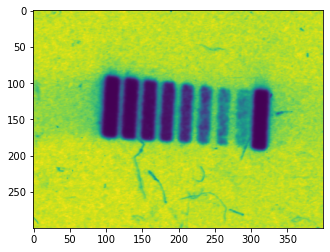

In [69]:
plt.imshow(asarray(im))

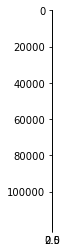

In [62]:
plt.imshow(np.array(list(Image.Image.getdata(im))))

In [4]:
# file_call2 = '/home/adel/Dropbox/QC2Python(spectrums)/Files/call2.txt'
file_call2 = 'Files/call2.txt'

data_call2 = [] #to work with data from txt file we should write it in array, so here we create an empty list 
with open(file_call2) as file:
    next(file)
    for line in file:
        row = line.split()
        row = [int(x) for x in row]
        data_call2.append(row) #add data from txt to the list

In [4]:
def fits2png(filename):
    
    """
    The function open fits file and return PIL Image file for visualisation
    and array with initial data from fits file
    """
    
    data_fits = fits.open(f"{filename}")[0].data
    image = Image.fromarray(np.uint8(data_fits*255/65536))
    #we should flip image because Image plot it by rows number
    #and here 0 row is bottom, when it must be top 
    image = image.transpose(Image.FLIP_TOP_BOTTOM)
    
    return image,data_fits

In [5]:
# file_call3 = '/home/adel/Dropbox/QC2Python(spectrums)/Files/call3.txt'
file_call3 = 'Files/call3.txt'


data_call3 = [] #to work with data from txt file we should write it in array, so here we create an empty list
with open(file_call3) as file:
    next(file)
    for line in file:
        row = line.split()
        row = [int(x) for x in row]
        data_call3.append(row) #add data from txt to the list

In [6]:
# file_call4 = '/home/adel/Dropbox/QC2Python(spectrums)/Files/call4.txt'
file_call4 = 'Files/call4.txt'

data_call4 = [] #to work with data from txt file we should write it in array, so here we create an empty list 
with open(file_call4) as file:
    next(file)
    for line in file:
        row = line.split()
        row = [int(x) for x in row]
        data_call4.append(row) #add data from txt to the list

In [7]:
o_call1 = np.array(data_call1)#*255/65536 #make an array from list
o_call2 = np.array(data_call2)#*255/65536 #make an array from list
o_call3 = np.array(data_call3)#*255/65536 #make an array from list
o_call4 = np.array(data_call4)#*255/65536 #make an array from list

In [47]:
o_call2

array([[28277, 28154, 27841, ..., 27210, 27034, 27054],
       [28203, 27937, 28067, ..., 28366, 28167, 27454],
       [27866, 27878, 27915, ..., 27994, 28596, 28303],
       ...,
       [28180, 27896, 27852, ..., 28074, 28314, 28947],
       [27452, 28349, 28556, ..., 28224, 28379, 29097],
       [28292, 28909, 28217, ..., 27823, 28351, 28591]])

### Save array as image

In [8]:
plt.imsave('pic_1.jpg', o_call1) #сохраняем массив из текста в картинку (чтобы на всякие случай проверить поворот картинки)
plt.imsave('pic_2.jpg', o_call2) #сохраняем массив из текста в картинку (чтобы на всякие случай проверить поворот картинки)

plt.imsave('pic_3.jpg', o_call3) #сохраняем массив из текста в картинку (чтобы на всякие случай проверить поворот картинки)
plt.imsave('pic_4.jpg', o_call4) #сохраняем массив из текста в картинку (чтобы на всякие случай проверить поворот картинки)

# Rotate and crop image

# Formula for bringing $\textbf{data to a convenient view}$. PREOB() function

# Table $\to$ row by mean value of coluns

$x_i = log_{10}\dfrac{x_max}{x_i}\times1000$

$x_i$ -- pixel value, $x_{max}$ -- maximum possible value. 

$x_{max}$ = 65536 if we have pixels value range (0,65536) and x_max = 255 if we have pixels value range (0,255)

We don't want to work with values like 26000 or smth like that, so we divide max pos value on our output value and take $log_{10}$. After that we get values of the order of 3-4. As soon as it too smal values and for axis stretching we multiply our value on 1000.

In [9]:
def subimage_preob(name_file,data, x1,y1,x2,y2,x3,y3,x4,y4): #calib, center, theta, width, height):
    ''' 
    Rotates OpenCV image around center with angle theta (in deg)
    then crops the image according to width and height.
    '''
#     path = os.getcwd()#для просмотра корневой дирректории
    lina_color = io.imread(f'{name_file}')
    lina_gray = color.rgb2gray(lina_color)
 #открываем картинку (не повёрнута, не обрезана) # массив файла калибровки (наш o_call)
    difr= data/lina_gray
    lina_gray = lina_gray*difr
    for i in range(0,len(lina_gray)):
        for j in range(0,len(lina_gray[i])):
            lina_gray[i][j] = int(lina_gray[i][j])
            if lina_gray[i][j] != data[i][j]:
                lina_gray[i][j] = data[i][j]
    polygon_data = ((x1,y1), (x2, y2), (x3, y3), (x4, y4)) 
    center = centroid(polygon_data) #обращается к фукции centroid
    width = np.sqrt((x2-x1)**2+(y2-y1)**2)
    height = np.sqrt((x4-x1)**2+(y4-y1)**2)
    theta = math.atan2((x1-x2),(y1-y2))
    if center[0]<1 and center[1]<1 and width<1: #проверка на случай если мы работаем в относительных координатах и их пересчёт к абсолютным
        center_x = int(center[0]*lina_gray.shape[1])
        center_y = int(center[1]*lina_gray.shape[0])
        width = int(width * lina_gray.shape[1])
        height = int(height * lina_gray.shape[0])
        center = (center_x,center_y)
        
    shape = ( lina_gray.shape[1], lina_gray.shape[0] ) # cv2.warpAffine expects shape in (length, height)
    matrix = cv2.getRotationMatrix2D( center=center, angle=theta, scale=1 ) #поворот матрицы вокруг указанного центра
    lina_gray = cv2.warpAffine(src=lina_gray, M=matrix, dsize=shape ) #сохранение повернутого изображения из матрицы

    x = int( center[0] - width/2  ) #поиск координаты x слева
    y = int( center[1] - height/2 ) # поиск координаты у снизу

    lina_gray = lina_gray[ y:int(y+height), x:int(x+width) ] #обрезка изображения по координатам
    
    #preob
    im_array = lina_gray# создаем из нее массив 
    array_log10 = np.log10(65536/im_array)*1000 #(257.003921569 = 65536/255), also data (смещение запятой)
    mean = array_log10.mean(axis=0) #среднее значение по столбцам
    
    
    plt.imshow(lina_gray) #path -- путь к корневой дирректории
    
    #возвращает обрезанное изображение
    return lina_gray,difr,lina_gray

In [10]:
def centroid(vertexes):
    x_list = [vertex[0] for vertex in vertexes]
    y_list = [vertex[1] for vertex in vertexes]
    lenth = len(vertexes)
    x = sum(x_list) / lenth
    y = sum(y_list) / lenth
    return(x, y)


In [38]:
def subimage_preob(name_file,data, x1,y1,x2,y2,x3,y3,x4,y4): #calib, center, theta, width, height):
    ''' 
    Rotates OpenCV image around center with angle theta (in deg)
    then crops the image according to width and height.
    '''
#     path = os.getcwd()#для просмотра корневой дирректории
    lina_color = io.imread(f'{name_file}')
    lina_gray = color.rgb2gray(lina_color)
    tan = (y2-y1)/(x2-x1)
    radian = math.atan2((y1-y2),(x1-x2))
    theta = radian*180/np.pi
    if theta > 90:
        theta = 180 - theta
    elif theta < -90:
        theta = 180 + theta
    else:
        theta = theta
    print(theta)
    for i in range(0,len(data)):
        for j in range(0,len(data[i])):
            lina_gray[i][j] = data[i][j]
    polygon_data = ((x1,y1), (x2, y2), (x3, y3), (x4, y4)) 
    center = centroid(polygon_data) #обращается к фукции centroid
    width = np.sqrt((x2-x1)**2+(y2-y1)**2)
    height = np.sqrt((x4-x1)**2+(y4-y1)**2)
    if center[0]<1 and center[1]<1 and width<1: #проверка на случай если мы работаем в относительных координатах и их пересчёт к абсолютным
        center_x = int(center[0]*lina_gray.shape[1])
        center_y = int(center[1]*lina_gray.shape[0])
        width = int(width * lina_gray.shape[1])
        height = int(height * lina_gray.shape[0])
        center = (center_x,center_y)
        
    shape = ( data.shape[1], data.shape[0] ) # cv2.warpAffine expects shape in (length, height)
    matrix = cv2.getRotationMatrix2D( center=center, angle=theta, scale=1 ) #поворот матрицы вокруг указанного центра
    lina_rotated = cv2.warpAffine(src=lina_gray, M=matrix, dsize=shape ) #сохранение повернутого изображения из матрицы

    x = int( center[0] - width/2  ) #поиск координаты x слева
    y = int( center[1] - height/2 ) # поиск координаты у снизу

    lina_croped = lina_rotated[ y:int(y+height), x:int(x+width) ] #обрезка изображения по координатам
    
    #preob
    array_log10 = np.log10(65536/lina_croped)*1000 #(257.003921569 = 65536/255), also data (смещение запятой)
    mean = array_log10.mean(axis=0) #среднее значение по столбцам
    
    
    plt.imshow(lina_croped) #path -- путь к корневой дирректории
    plt.gca().invert_yaxis()
    #возвращает обрезанное изображение
    return lina_croped,mean

In [42]:
lina_color = io.imread(f'pic_2.jpg')
lina_gray = color.rgb2gray(lina_color)

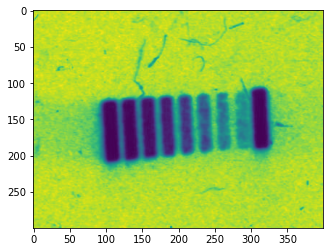

In [45]:
plt.imshow(lina_gray[::-1])

In [ ]:
matrix = cv2.getRotationMatrix2D(center=center, angle=theta, scale=1)

In [ ]:
math.atan2((y1-y2),(x1-x2))

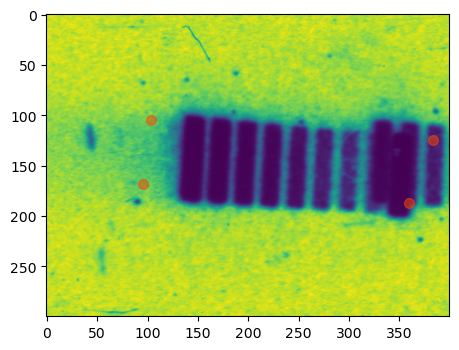

In [35]:
# from PIL import Image, ImageColor
# from PIL import ImageDraw

x1= int(0.259 * o_call1.shape[1])
y1= int((1-0.648) * o_call1.shape[0])
x2= int(0.96 * o_call1.shape[1])
y2= int((1-0.584) * o_call1.shape[0])
x3= int(0.9 * o_call1.shape[1])
y3= int((1-0.376) * o_call1.shape[0])
x4= int(0.242 * o_call1.shape[1])
y4= int((1-0.44) * o_call1.shape[0])
fig = plt.figure(figsize=(8,4),dpi = 100)#(figsize=(14,7),dpi = 200)
plt.imshow(o_call1)
# image_1,mean_1= subimage_preob('pic_1.jpg',o_call1,x1,y1,x2,y2,x3,y3,x4,y4)
x = [x1,x2,x3,x4]
y = [y1,y2,y3,y4]
plt.scatter(x,y,color = 'orangered', s = 50, alpha = 0.5)

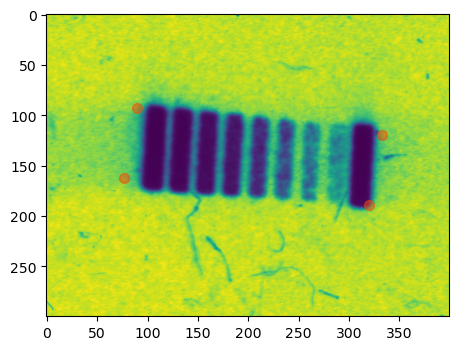

In [40]:
x1= int(0.226 * o_call2.shape[1])
y1= int((1-0.689) * o_call2.shape[0])
x2= int(0.833 * o_call2.shape[1])
y2= int((1-0.602) * o_call2.shape[0])
x3= int(0.8 * o_call2.shape[1])
y3= int((1-0.37) * o_call2.shape[0])
x4= int(0.193 * o_call2.shape[1])
y4= int((1-0.457) * o_call2.shape[0])
fig = plt.figure(figsize=(8,4),dpi = 100)#(figsize=(14,7),dpi = 200)
plt.imshow(o_call2)
# image_1,mean_1= subimage_preob('pic_1.jpg',o_call1,x1,y1,x2,y2,x3,y3,x4,y4)
x = [x1,x2,x3,x4]
y = [y1,y2,y3,y4]
plt.scatter(x,y,color = 'orangered', s = 50, alpha = 0.5)
# image_2,mean_2 = subimage_preob('pic_2.jpg',o_call2,x1,y1,x2,y2,x3,y3,x4,y4)

plt.figure(figsize=(20,10))
plt.imshow(o_call2,cmap="gray")
plt.axis("off")
plt.savefig("call_whole.jpg")


plt.figure(figsize=(20,10))
plt.imshow(image_2,cmap="gray")
plt.axis("off")
plt.savefig("call_croped.jpg")

3.96031183045838


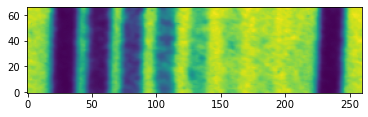

In [14]:
x1= int(0.173 * o_call3.shape[1])
y1= int(0.649 * o_call3.shape[0])
x2= int(0.824 * o_call3.shape[1])
y2= int(0.589 * o_call3.shape[0])
x3= int(0.804 * o_call3.shape[1])
y3= int(0.365 * o_call3.shape[0])
x4= int(0.153 * o_call3.shape[1])
y4= int(0.424 * o_call3.shape[0])

image_3,mean_3 = subimage_preob('pic_3.jpg',o_call3,x1,y1,x2,y2,x3,y3,x4,y4)

3.379683783322662


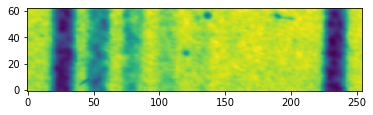

In [15]:
x1= int(0.166 * o_call4.shape[1])
y1= int(0.640 * o_call4.shape[0])
x2= int(0.8 * o_call4.shape[1])
y2= int(0.590 * o_call4.shape[0])
x3= int(0.781 * o_call4.shape[1])
y3= int(0.378 * o_call4.shape[0])
x4= int(0.147 * o_call4.shape[1])
y4= int(0.432 * o_call4.shape[0])


image_4,mean_4 = subimage_preob('pic_4.jpg',o_call4,x1,y1,x2,y2,x3,y3,x4,y4)

### Save txt with mean values

In [16]:
np.savetxt('Files/call1_mean.txt', mean_1)
np.savetxt('Files/call2_mean.txt', mean_2)
np.savetxt('Files/call3_mean.txt', mean_3)
np.savetxt('Files/call4_mean.txt', mean_4)

# Graph

Text(0.5, 1.0, 'call1')

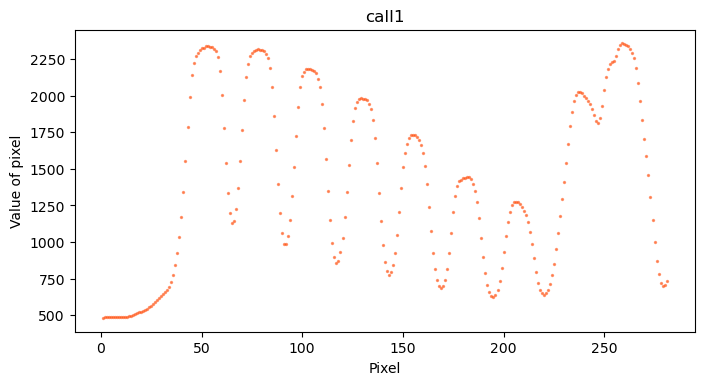

In [17]:
fig = plt.figure(figsize=(8,4),dpi = 100)#(figsize=(14,7),dpi = 200)
ax = fig.add_subplot(111)
# mean_call1 = preob(revers1)
x = np.arange(1, len(mean_1) + 1)
ax.scatter(x,mean_1,color = 'orangered', s = 2, alpha = 0.5)
ax.set_xlabel("Pixel")
ax.set_ylabel("Value of pixel")
ax.set_title('call1')
# plt.xlim(50,100)

Text(0, 0.5, 'Optical density')

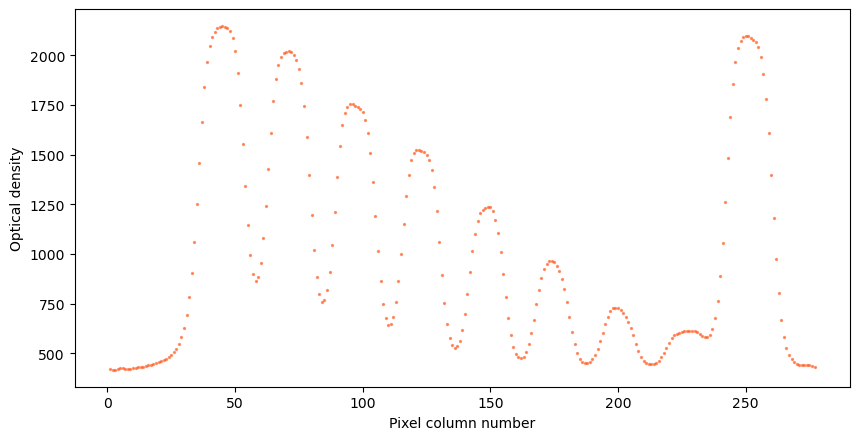

In [18]:
fig = plt.figure(figsize=(10,5),dpi = 100)#(figsize=(14,7),dpi = 200)
ax = fig.add_subplot(111)
# mean_call1 = preob(revers1)
x = np.arange(1, len(mean_2) + 1)
ax.scatter(x,mean_2,color = 'orangered', s = 2, alpha = 0.5)
# ax.set_xlabel("Номер столбца пикселей")
# ax.set_ylabel("Оптическая плотность")
ax.set_xlabel("Pixel column number")
ax.set_ylabel("Optical density")
# ax.set_title('call2')
# plt.xlim(50,100)
# plt.savefig("preob.jpg")

Text(0.5, 1.0, 'call3')

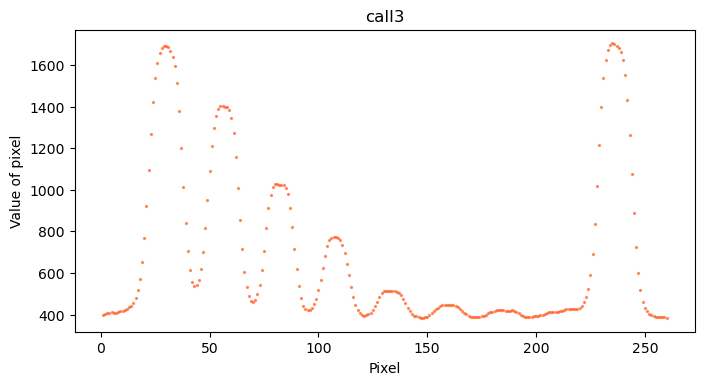

In [19]:
fig = plt.figure(figsize=(8,4),dpi = 100)#(figsize=(14,7),dpi = 200)
ax = fig.add_subplot(111)
# mean_call1 = preob(revers1)
x = np.arange(1, len(mean_3) + 1)
ax.scatter(x,mean_3,color = 'orangered', s = 2, alpha = 0.5)
ax.set_xlabel("Pixel")
ax.set_ylabel("Value of pixel")
ax.set_title('call3')
# plt.xlim(50,100)

Text(0.5, 1.0, 'call4')

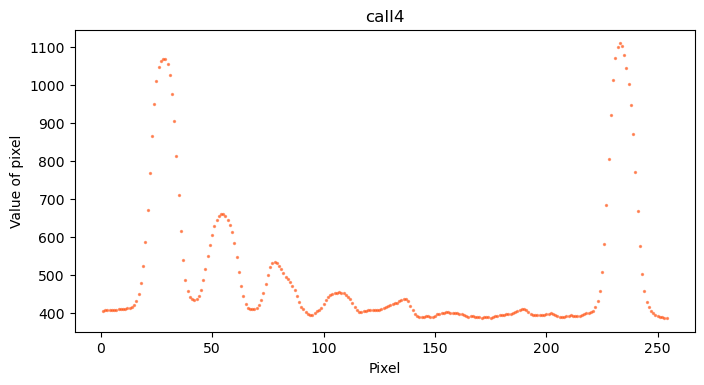

In [20]:
fig = plt.figure(figsize=(8,4),dpi = 100)#(figsize=(14,7),dpi = 200)
ax = fig.add_subplot(111)
# mean_call1 = preob(revers1)
x = np.arange(1, len(mean_4) + 1)
ax.scatter(x,mean_4,color = 'orangered', s = 2, alpha = 0.5)
ax.set_xlabel("Pixel")
ax.set_ylabel("Value of pixel")
ax.set_title('call4')
# plt.xlim(50,100)

# Peaks finding

In [21]:
def peaks(mean,order):
    """
    function for searching peaks in array 
    """
    peak_indexes = signal.argrelextrema(mean, np.greater, order=order)[0] #индексы пиков 
    peak_mean =[] # создаем пустой массив для средних значений пиков
    for i in range(0,len(mean)):
        if i in peak_indexes:
            peak_mean.append((mean[i-2]+mean[i-1]+mean[i]+mean[i+1]+mean[i+2])/5) # ищем среднее по пяти рядом стоящих значений
    #возвращает позицию/индекс найденного пика и среднее значение по пяти значениям : пик + 2 слева + 2 справа
    return peak_indexes,peak_mean

In [22]:
# peak_indexes_1,peak_mean_1 = peaks(mean_call1,order=8)
# peak_indexes_2,peak_mean_2 = peaks(mean_call2,order=8)
# peak_indexes_3,peak_mean_3 = peaks(mean_call3,order=4)
peak_indexes_4,peak_mean_4 = peaks(mean_4,order=9)

### Peaks graph

NameError: name 'peak_indexes_1' is not defined

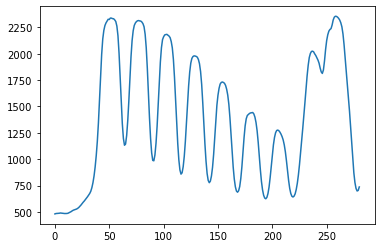

In [22]:
x1 = np.arange(0,len(mean_1))
plt.plot(x1,mean_1)
plt.scatter(peak_indexes_1, mean_1[[peak_indexes_1]], color = 'y', s = 10, marker = 'D', label = 'maxima')
plt.scatter(peak_indexes_1, peak_mean_1, color = 'r', s = 10, marker = 'D', label = 'maxima')

In [ ]:
x2 = np.arange(0,len(mean_call2))
plt.plot(x2,mean_call2)
plt.scatter(peak_indexes_2, mean_call2[[peak_indexes_2]], color = 'y', s = 10, marker = 'D', label = 'maxima')
plt.scatter(peak_indexes_2, peak_mean_2, color = 'r', s = 10, marker = 'D', label = 'maxima')

In [ ]:
x3 = np.arange(0,len(mean_call3))
plt.plot(x3,mean_call3)
plt.scatter(peak_indexes_3, mean_call3[[peak_indexes_3]], color = 'y', s = 10, marker = 'D', label = 'maxima')
plt.scatter(peak_indexes_3, peak_mean_3, color = 'r', s = 10, marker = 'D', label = 'maxima')

<ipython-input-23-227411d856fa>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.scatter(peak_indexes_4, mean_4[[peak_indexes_4]], color = 'y', s = 10, marker = 'D', label = 'maxima')


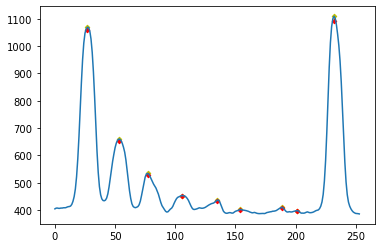

In [23]:
x4 = np.arange(0,len(mean_4))
plt.plot(x4,mean_4)
plt.scatter(peak_indexes_4, mean_4[[peak_indexes_4]], color = 'y', s = 10, marker = 'D', label = 'maxima')
plt.scatter(peak_indexes_4, peak_mean_4, color = 'r', s = 10, marker = 'D', label = 'maxima')

## Our function for peaks

In [23]:
def peaks(mean):    
    
    for ind,p in enumerate(mean): 
        
        if p < mean[ind+1]:
            continue
        
        else:
            first_peak_ind = ind
            break

    random_peak_ind=[first_peak_ind]
    
    for ind in range(first_peak_ind+1,len(mean)-1):
        
        if mean[ind] > mean[ind-1] and mean[ind] > mean[ind+1]:
            random_peak_ind.append(ind)
            
    bad_peaks = []
    good_peaks = []
    min_dist = 10
    counter = 0
    
    for ind in range(0,len(random_peak_ind)-1):
        delta = random_peak_ind[ind+1] - random_peak_ind[ind]
        
        if delta < min_dist:
            bad_peaks.append(random_peak_ind[ind])
            bad_peaks.append(random_peak_ind[ind+1])
        
        else:
            
            if len(bad_peaks)==0:
                good_peaks.append(random_peak_ind[ind])
            
            else:
                bad_peaks = np.array(np.unique(bad_peaks))
                mean_index = int(bad_peaks.mean())
                good_peaks.append(mean_index)
                bad_peaks = []

    good_peaks.append(random_peak_ind[-1])
    
    if len(good_peaks) > 9:
        
        if mean[[good_peaks[-1]]] < mean[[good_peaks[-2]]]:
            good_peaks = good_peaks[:-1] 
            
    peak_mean =[] # создаем пустой массив для средних значений пиков
    for i in range(0,len(mean)):
        if i in good_peaks:
            peak_mean.append((mean[i-2]+mean[i-1]+mean[i]+mean[i+1]+mean[i+2])/5) # ищем среднее по пяти рядом стоящих значений
    #возвращает позицию/индекс найденного пика и среднее значение по пяти значениям : пик + 2 слева + 2 справа        

    return good_peaks, peak_mean                    

In [24]:
good_peaks_1, peak_mean_1 = peaks(mean_1)

good_peaks_2, peak_mean_2 = peaks(mean_2)

In [25]:
good_peaks_3, peak_mean_3 = peaks(mean_3)

In [30]:
good_peaks_4, peak_mean_4 = peaks(mean_4)

<ipython-input-27-e49db8db4afa>:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.scatter(good_peaks_1, mean_1[[good_peaks_1]], color = 'r', s = 10, marker = 'D', label = 'maxima')


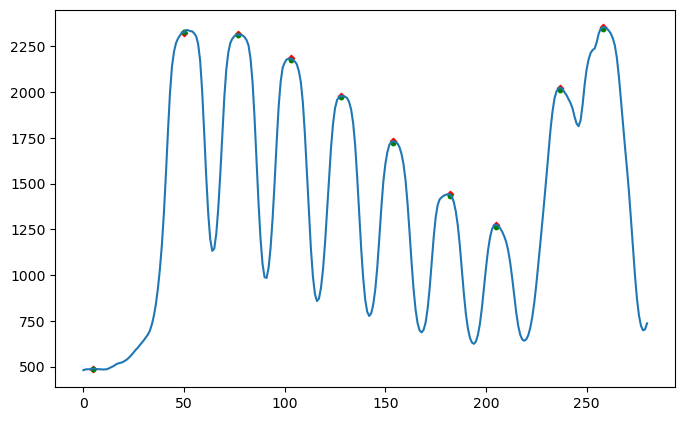

In [27]:
plt.figure(figsize = (8,5),dpi=100)
x4 = np.arange(0,len(mean_1))
plt.plot(x4,mean_1)
plt.scatter(good_peaks_1, mean_1[[good_peaks_1]], color = 'r', s = 10, marker = 'D', label = 'maxima')       
plt.scatter(good_peaks_1, peak_mean_1, color = 'g', s = 10, marker = 'o', label = 'maxima')       

<ipython-input-26-96cc79075d42>:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.scatter(good_peaks_2, mean_2[[good_peaks_2]], color = 'r', s = 15, marker = 'D', label = "Пики")


Text(0, 0.5, 'Оптическая плотность')

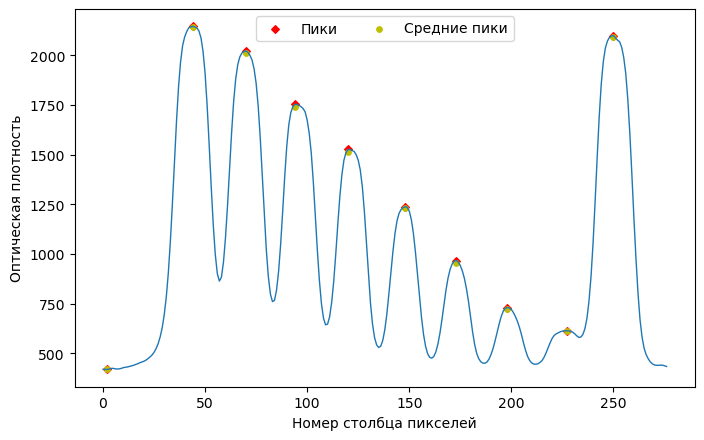

In [26]:
plt.figure(figsize = (8,5),dpi=100)
x4 = np.arange(0,len(mean_2))
plt.plot(x4,mean_2,lw=1)
# plt.scatter(good_peaks_2, mean_2[[good_peaks_2]], color = 'r', s = 15, marker = 'D', label = "Peaks")       
# plt.scatter(good_peaks_2, peak_mean_2, color = 'y', s = 15, marker = 'o',  label = "Mean peaks") 
plt.scatter(good_peaks_2, mean_2[[good_peaks_2]], color = 'r', s = 15, marker = 'D', label = "Пики")       
plt.scatter(good_peaks_2, peak_mean_2, color = 'y', s = 15, marker = 'o',  label = "Средние пики")   
plt.legend(ncol=2,loc=9)
plt.xlabel("Номер столбца пикселей")
plt.ylabel("Оптическая плотность")
# plt.xlabel("Pixel column number")
# plt.ylabel("Optical density")
# plt.savefig("peaks.jpg")

<ipython-input-28-9f98bacd1b97>:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.scatter(good_peaks_3, mean_3[[good_peaks_3]], color = 'r', s = 10, marker = 'D', label = 'maxima')


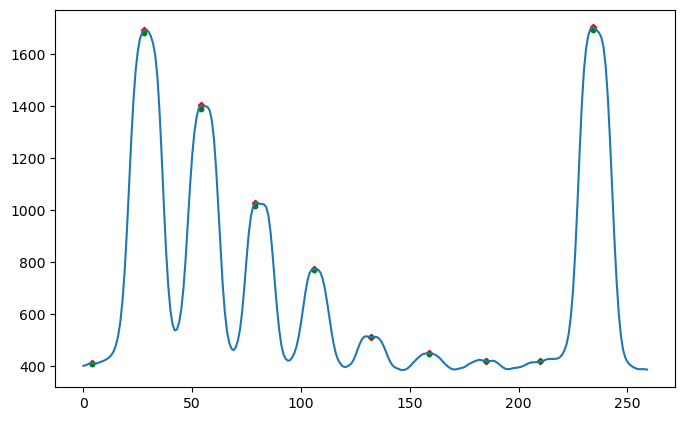

In [28]:
plt.figure(figsize = (8,5),dpi=100)
x4 = np.arange(0,len(mean_3))
plt.plot(x4,mean_3)
plt.scatter(good_peaks_3, mean_3[[good_peaks_3]], color = 'r', s = 10, marker = 'D', label = 'maxima')       
plt.scatter(good_peaks_3, peak_mean_3, color = 'g', s = 10, marker = 'o', label = 'maxima')       

NameError: name 'good_peaks_4' is not defined

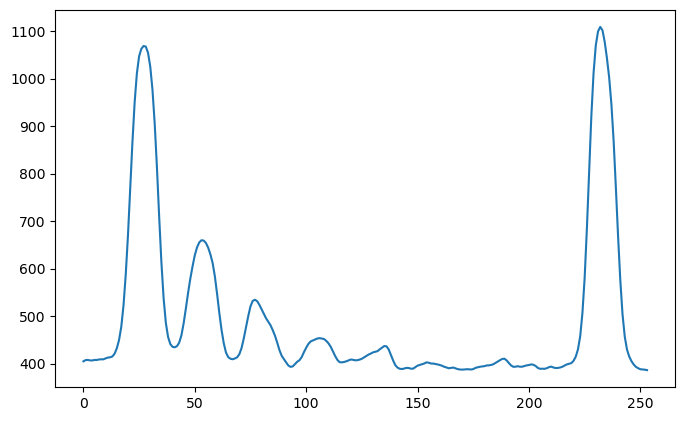

In [27]:
plt.figure(figsize = (8,5),dpi=100)
x4 = np.arange(0,len(mean_4))
plt.plot(x4,mean_4)
plt.scatter(good_peaks_4, mean_4[[good_peaks_4]], color = 'r', s = 10, marker = 'D', label = 'maxima')       
plt.scatter(good_peaks_4, peak_mean_4, color = 'g', s = 10, marker = 'o', label = 'maxima')       

# Сharacteristic curve

Data for step attenuators in stellar magnitudes (L.N. gave):

$Period / step$| $1$ | $2$    | $3$    | $4$    | $5$    | $6$    | $7$    | $8$    | $9$ |
---          |---|---   |---   |---   |---   |---   |---   |---   |---|
$before~1972  $| $0$ | $0.61$ | $1.1 $ | $1.47$ | $1.84$ | $2.25$ |$ 2.66$ |$ 3.04$ | $0$ |
$after~1972   $| $0$ | $0.5 $ | $0.97$ | $1.44$ | $1.93$ | $2.43$ |$2.69 $ |$3.04 $ | $0$ |

The $1^{st}$ and the $9^{th}$ steps have the same value.

When we plot graph we will see that we should shift our point
We have different exposure time, so our graphs looks not similary
For right shifting we should find log of deviding maximum exposure for other and multiply it by 2.5

$delta_i = 2.5 \times \dfrac{exposure_{max}}{exposure_i}$

In [29]:
#Data for step attenuators in stellar magnitudes (L.N. gave) 
mag_before_1972 = [0,0.61,1.1,1.47,1.84,2.25,2.66,3.04,0]
mag_after_1972 = [0,0.5,0.97,1.44,1.93,2.43,2.69,3.04,0]

delta_m1 = 2.5*np.log(120/120)
delta_m2 = 2.5*np.log(120/90)
delta_m3 = 2.5*np.log(120/60)
delta_m4 = 2.5*np.log(120/40)

Text(0, 0.5, 'Optical density')

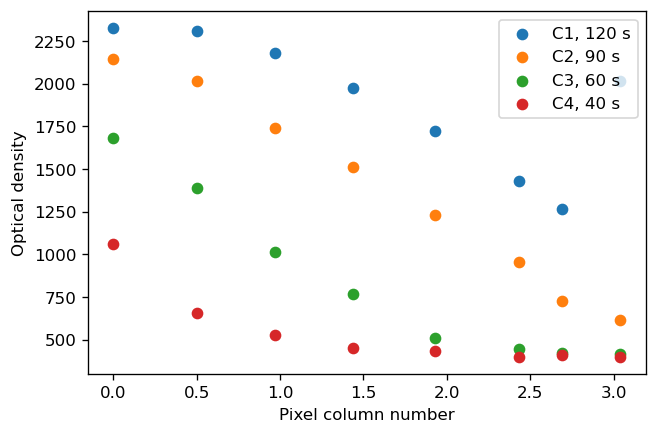

In [30]:
plt.figure(figsize=(6,4),dpi=120)
# if len(peak_mean_1) > 8:
#     plt.scatter(mag_after_1972[:-1],peak_mean_1[1:9], label="К1, 120 сек")
# plt.scatter(mag_after_1972[:-1],peak_mean_2[1:9], label="К2, 90 сек")
# plt.scatter(mag_after_1972[:-1],peak_mean_3[1:9], label="К3, 60 сек")
# plt.scatter(mag_after_1972[:-1],peak_mean_4[:8], label="К4, 40 сек")

if len(peak_mean_1) > 8:
    plt.scatter(mag_after_1972[:-1],peak_mean_1[1:9], label="C1, 120 s")
plt.scatter(mag_after_1972[:-1],peak_mean_2[1:9], label="C2, 90 s")
plt.scatter(mag_after_1972[:-1],peak_mean_3[1:9], label="C3, 60 s")
plt.scatter(mag_after_1972[:-1],peak_mean_4[:8], label="C4, 40 s")

plt.legend()
# plt.xlabel("Звездные величины")
# plt.ylabel("Оптическая плотность")
plt.xlabel("Pixel column number")
plt.ylabel("Optical density")
# plt.savefig("peaks_curve_deviated.jpg")

Text(0, 0.5, 'Оптическая плотность')

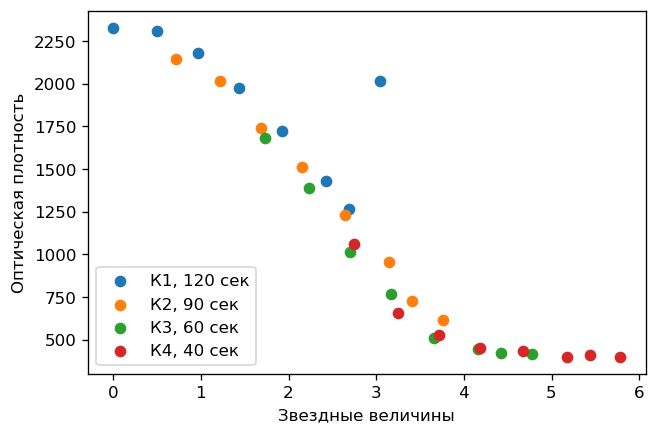

In [31]:
plt.figure(figsize=(6,4),dpi=120)

if len(peak_mean_1) > 8:
    plt.scatter(mag_after_1972[:-1]+delta_m1,peak_mean_1[1:9], label="К1, 120 сек")

plt.scatter(mag_after_1972[:-1]+delta_m2,peak_mean_2[1:9], label="К2, 90 сек")
plt.scatter(mag_after_1972[:-1]+delta_m3,peak_mean_3[1:9], label="К3, 60 сек")
plt.scatter(mag_after_1972[:-1]+delta_m4,peak_mean_4[:8], label="К4, 40 сек")


# if len(peak_mean_1) > 8:
#     plt.scatter(mag_after_1972[:-1]+delta_m1,peak_mean_1[1:9], label="C1, 120 s")

# plt.scatter(mag_after_1972[:-1]+delta_m2,peak_mean_2[1:9], label="C2, 90 s")
# plt.scatter(mag_after_1972[:-1]+delta_m3,peak_mean_3[1:9], label="C3, 60 s")
# plt.scatter(mag_after_1972[:-1]+delta_m4,peak_mean_4[:8], label="C4, 40 s")


plt.legend(loc=3)

plt.xlabel("Звездные величины")
plt.ylabel("Оптическая плотность")
# plt.xlabel("Pixel column number")
# plt.ylabel("Optical density")
# plt.savefig("peaks_curve_alighned.jpg")

In [32]:
array = [peak_mean_1[1:9],peak_mean_2[1:9],peak_mean_3[1:9],peak_mean_4[:8]]
y_array = np.concatenate(array)
x_array = np.concatenate([mag_after_1972[:-1]+delta_m1,mag_after_1972[:-1]+delta_m2,mag_after_1972[:-1]+delta_m3,mag_after_1972[:-1]+delta_m4])

# Cleaning

If we have values wich differ more than 3$\sigma$ from previous value or 5$\sigma$ from mean

# Mean deviation

In [33]:
# array = [peak_mean_1[1:-1],peak_mean_2[:8],peak_mean_3[:8],peak_mean_4[:-1]]
# y_array = np.concatenate(array)
# x_array = np.concatenate([mag_after_1972[:-1]+delta_m1,mag_after_1972[:-1]+delta_m2,mag_after_1972[:-1]+delta_m3,mag_after_1972[:-1]+delta_m4])

#we calculate mean deveation by calculating delta between each neighboring element, sum it and the devide by number of elements 
c = []
for i in range(1,len(y_array)):
    c.append(abs(y_array[i] - y_array[i-1]))
mean_deviation = np.array(c).sum()/len(y_array)

#now we sort our data: if delta between neighboring elements larger than 2 mean deveation we will remove it
indexes = []
for i in range(1,len(y_array)):
    if abs(y_array[i]-y_array[i-1])>mean_deviation*2:
        indexes.append(i)

y_array = np.delete(y_array,indexes)
x_array = np.delete(x_array,indexes)
#Imax = 10000
xarray_flux = 10000/10**(x_array/2.5)

In [34]:
#now we shoudl sort our data to don't get convoluted curve

a = []
for i in range(0,len(xarray_flux)):
    a.append([xarray_flux[i],y_array[i]])

a.sort(key=lambda x:x[0])

xarray_flux = []
y_array = []

for i in range(0,len(a)):
    xarray_flux.append(a[i][0])
    y_array.append(a[i][1])
    
xarray_flux = np.array(xarray_flux)
y_array = np.array(y_array)       

del a

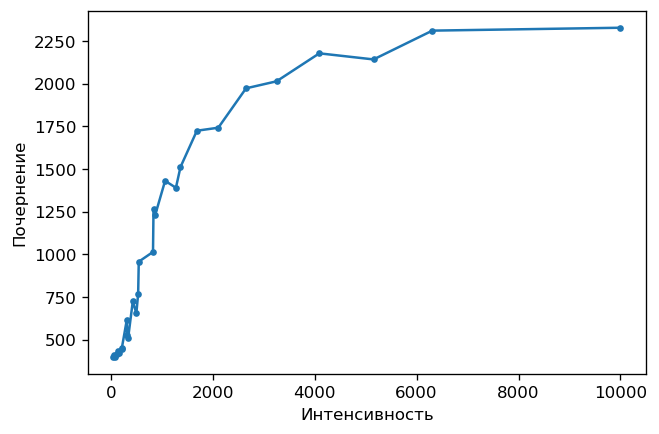

In [35]:
plt.figure(figsize=(6,4),dpi=120)
plt.plot(xarray_flux, y_array, markersize=3,marker='o' )
# plt.ylim(0,4000)
# plt.xlim(0,1000)
plt.xlabel("Интенсивность")
plt.ylabel("Почернение")
plt.savefig("characteristic_curve_first.jpg")

In [45]:
def aprx(x,y,order):

    monotone = False
    while monotone == False:
        
        z = np.polyfit( x,y,order)
        p = np.poly1d(z)
        xp = np.linspace(0, x[-1], 1000)
        # print(xp)
        pxp = p(xp)

        for i in range(1,len(pxp)):
            max_pxp = y[:-1].max()
            if pxp[i]<=pxp[i-1]:
                pxp[i]=pxp[i-1]+1
                if pxp[i]>=max_pxp:
                    min_pxp = pxp[i-100]
                    delta_pxp = abs((max_pxp - min_pxp)/(len(pxp)-i-1))
                    index = i-10
                    break


        for j in range(index+1,len(pxp)):
            pxp[j]=pxp[j-1]+delta_pxp

        z = np.polyfit( xp,pxp, 6)
        pp = np.poly1d(z)
        xpp = np.linspace(0, x[-1], 1000)

        pxpp = pp(xpp)
        
        check = []
        for k in range(0,len(pxpp)-1):      
            if pxpp[k]>pxpp[k+1]:
                check.append(k)
        
        if len(check) == 0:
                monotone = True
        else:
            order = order+1
            monotone = False
               
    fig, ax1 = plt.subplots(figsize=(8,5),dpi=80)
    ax1 = plt.scatter(x[:-1],y[:-1], color="blue",s=5) 
    ax1 = plt.plot(xp, p(xp), color="orange")           

    fig, ax2 = plt.subplots(figsize=(6,4),dpi=120)
    ax2 = plt.plot( xpp, pp(xpp), lw=1, label = f"Аппроксимация полиномом ({order},6)")#"Polynomial approximation")
    ax2 = plt.scatter(x[:-1],y[:-1], color="red",s=50,marker='.')#, label = "Attenuator magnitude")
    plt.legend()
#     plt.xlabel("Интенсивность [эрг/с]")
#     plt.ylabel("Оптическая плотность")
    plt.xlabel("Intensity  [erg/s]")
    plt.ylabel("Optical density")
#     plt.yticks([200, 300, 400, 500, 600, 700, 800, 900])
#     plt.savefig("characteristic_curve.jpg")
    return xpp,pp

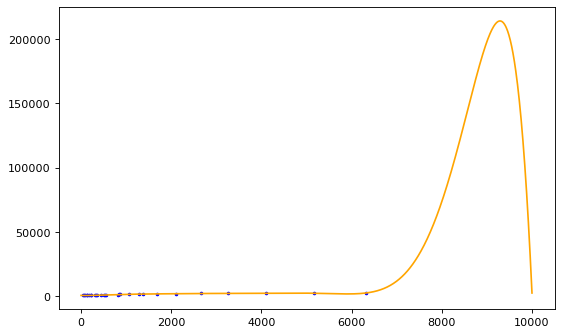

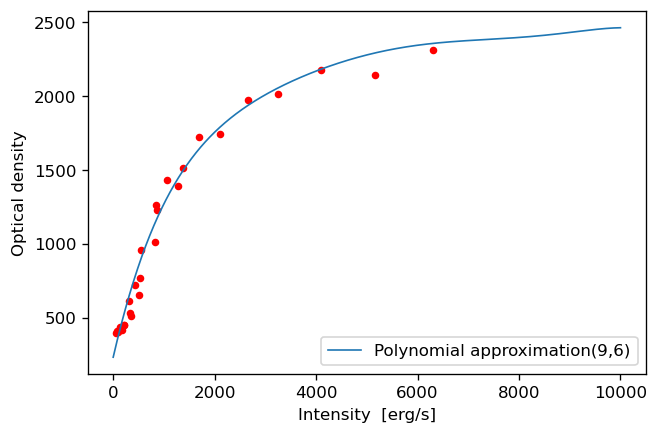

In [46]:
xpp,polinomial = aprx(xarray_flux,y_array,6)

In [42]:
print(polinomial)

            6             5             4             3             2
-3.472e-20 x + 1.243e-15 x - 1.779e-11 x + 1.324e-07 x - 0.0005667 x + 1.489 x + 231.6


# Spectrum 

In [47]:
def polynomial_alighn(data,low_limit,up_limit,order):
    
    """
    function aligns the spectrum through finding min value in each column and approximate it with polynomial and mean for polinomial line
    
    data - whole image
    up_limit,low_limit - limits of spectra in rows number
    order - polinomial order to approximate spectra
    
    """
    
    data_part = data[low_limit:up_limit]
    fig, ax1 = plt.subplots(figsize=(8,5),dpi=100)
    ax1.imshow(data_part, cmap='gray')
#     plt.imsave('pic_lamp_20s.jpg', data_part)
    ax1.set_title("Initial part of spectra")
#     plt.savefig("initial_part.eps")
    
    #create massive of part of whole spectra with arrays of columns, not rows
    data_columns = []
    for i in range(0,len(data_part[0])):
        data_columns.append(list(data_part[:,i]))
    data_columns=list(data_columns)
    
    #create massive of whole spectra with arrays of columns, not rows
    data_collumns_entire_image = []
    for j in range(0,len(data[0])):
        data_collumns_entire_image.append(list(data[:,j]))
    data_collumns_entire_image=list(data_collumns_entire_image)

    #find min value in each column and then find indexes of the values - they will be Y-coordinate
    data_col_min = data_part.min(axis=0)

#     data_col_min = data_part.max(axis=0)
    index = []
    for i in range(0,len(data_col_min)):
            index.append(data_columns[i].index(data_col_min[i]))


    #find median value of neighboring indexes of min values in each column in some ranges to compairing in the next steps
    #we schould find mediam values for ranges not for whole image, because we have non-linear graph and it has curvature  
    median = []
    n = 0
    while n+100<len(index):
        k=n+100
        median.append([n,k,np.median(index[n:k])])
        n=k
    else:
        median.append([n,-1,np.median(index[n:])])

    #calculate mean delta between neighboring values
    delt=[]
    for i in range(1,len(index)):
        delt.append(abs(index[i]-index[i-1]))
    delt_mean = np.array(delt).sum()/len(delt)    

    #now we compair difference between median value indexes of minimum value in each column     
    for i in median:
        for j in range(i[0],i[1]):
            if abs(i[2]-index[j])>delt_mean:
                index[j] = i[2]

    fig, ax2 = plt.subplots(figsize=(8,5),dpi=100)
    ax2.plot(index)
    
    #plot polynomial
    xp = np.arange(0,len(index))
    z = np.polyfit(xp,index, order)
    polynomial = np.poly1d(z)
    y_polynomial = polynomial(xp)
    ax2.plot(index, color="steelblue", label="Median") 
    ax2.plot(xp, y_polynomial, color="orange", label=f"Polinomial ({order})")
#     ax2.set_title("Polinomial approximation of spectra")
#     ax2.set_xlabel("Номер столбца пикселей")
#     ax2.set_ylabel("Номер строки пикселей")
    ax2.set_xlabel("Pixel column number")
    ax2.set_ylabel("Pixel row number")
    ax2.legend()
#     plt.savefig("polinomial_spectra.jpg")
    
    xp_tg = np.arange(0,len(y_polynomial))
    z_tg = np.polyfit(xp_tg,y_polynomial, 1)
    polynomial_tg = np.poly1d(z_tg)
    y_polynomial_tg = polynomial_tg(xp_tg)
    tg = polynomial_tg[1]
    
    #now we will plot our curve on our frame
    mean_polynomial = y_polynomial.mean()
    fig, ax3 = plt.subplots(figsize=(8,5),dpi=100)
    ax3.imshow(data_part, cmap='gray')
    ax3.plot(xp, y_polynomial, color="orange", label=f"Polinomial, order = {order}")
    ax3.axhline(mean_polynomial, label="Polinomial mean")
    ax3.set_axis_off()
#     ax3.legend(bbox_to_anchor=(1.01,0.5))
#     plt.savefig("polinomial_mean.jpg")
    
    delta_y = []
    for i in range(0,len(index)):
        delta = mean_polynomial - polynomial(xp)[i]
        delta_y.append(int(delta))

    shape = np.array(data_collumns_entire_image).shape
    new_pic_col = np.zeros(shape)
    for i in range(0,len(data_collumns_entire_image)):
        for j in range(0,len(data_collumns_entire_image[i])):
            m  = j + delta_y[i]
            if m<len(data_collumns_entire_image[i]):
                new_pic_col[i][m] = data_collumns_entire_image[i][j] 
            else:
                m = m - len(data_collumns_entire_image[i])
                new_pic_col[i][m] = data_collumns_entire_image[i][j] 
    data_rows = []
    for i in range(0,len(new_pic_col[0])):
        data_rows.append(list(new_pic_col[:,i]))
            
    
    delta_x = np.arange(0,len(data_rows))*tg
    shape = np.array(data_rows).shape
    new_data_rows = np.zeros(shape)
    for i in range(0,len(data_rows)):
        for j in range(0,len(data_rows[i])):
            m  = int(j + 2*delta_x[i])
            if m<len(data_rows[i]):
                new_data_rows[i][m] = data_rows[i][j] 
            else:
                m = m - len(data_rows[i])
                new_data_rows[i][m] = data_rows[i][j] 
    
    aligned_image = new_data_rows
    
    fig, ax4 = plt.subplots(figsize=(8,5),dpi=100)
    ax4.imshow(aligned_image, cmap='gray')
    plt.axis("off")
    # ax4.grid()
#     ax4.set_title("Aligned spectra")
#     plt.savefig("aligned_spectra.jpg")
    
    return aligned_image

In [48]:
fits = fits.open('Sh2-266_04-05.04.1978_15m_2433-corr.fit.fits')

data  = fits[0].data

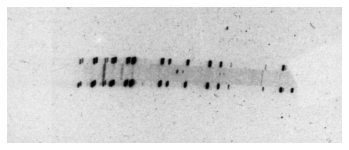

In [49]:
plt.imshow(data, cmap='gray')
plt.axis("off")
plt.savefig("data.jpg")

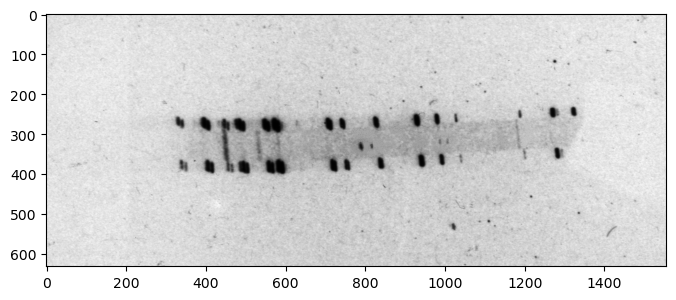

In [50]:
plt.figure(figsize=(8,5),dpi=100)
plt.imshow(data[::-1], cmap='gray')
# plt.axis("off")
# plt.savefig("data.jpg")

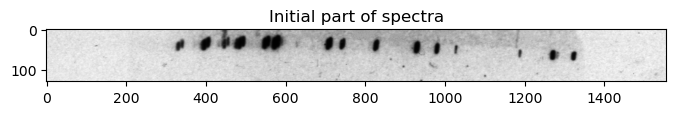

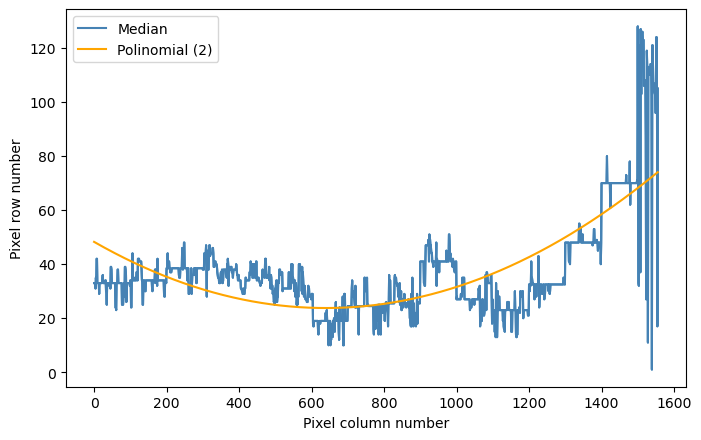

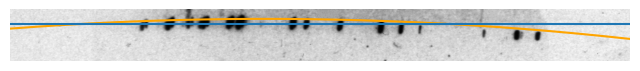

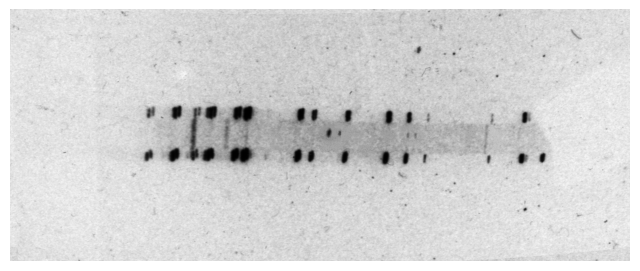

In [51]:
spectra= polynomial_alighn(data,320,450,2)

In [126]:
def preob_spectra(spectra):
    
    """
    Функция пересчитывает плотности почернения в интенсивности при помощи полинома, полученного 
    в работе с калибровками.
    На выходе преобразованный спектр и график, из которого необходимо определить на каких строках (х1 и х1) находится спектр.
    Тут же можно определить где находятся лампы.
    """
    x_log = (np.log10(65536/spectra) * 1000)
#     spectra_ = (2.803e-20*x_log**6 - 5.835e-16*x_log**5 + 1.635e-12*x_log**4 + 4.247e-08*x_log**3 - 0.0004067*x_log**2 + 1.439*x_log + 196.7).sum()
    
    spectra_ = polinomial(x_log)
#     
    sum_intens_row = spectra_.sum(axis=1)
    
    plt.figure(figsize=(6,4),dpi=120)
    plt.plot(sum_intens_row/1e6)
#     plt.grid(lw=0.1)
#     plt.xlabel("Номер строки пикселей")
#     plt.ylabel(r"Сумма интенсивностей [$\times10^6$ эрг/с]")
    plt.xlabel("Pixel row number")
    plt.ylabel(r"Sum of intensities [$\times10^6$ erg/s]")
#     plt.savefig("spectra_background_rows.jpeg")
    return spectra_

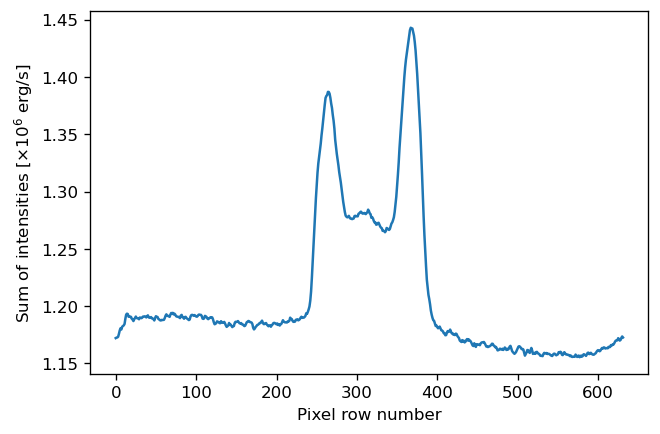

In [127]:
spectra_preob = preob_spectra(spectra)

In [72]:
def spectra_lamps(data,y1,y2,y3,y4):
    
    """
    Функция для вырезания из целого изображения спектра двух ламп и
    спектра самого объекта по отдельнсти.
    """
    
    lamp_1 = data[y1:y2]
    spectra = data[y2:y3]
    lamp_2 = data[y3:y4]
    
    return lamp_1, spectra, lamp_2

In [73]:
lamp_1, spectra_back, lamp_2 = spectra_lamps(spectra_preob,230,286,340,400)

In [9]:
def spectra_background(data,x1,x2):
    
    """
    Разбивает часть изображения со спектром на фон (над и под) и спектр.
    Вычитает фон из спектра и 
    на выходе выдает ГОТОВЫЙ спектр (+график, конечно же)
    """
    
    back_1 = data[0:x1]
    back_2 = data[x2:]
    back = np.concatenate((back_1,back_2))
    back_mean = back.mean(axis=0)
    
    spectrum = data[x1:x2]
    spectrum_sum = np.array(spectrum).sum(axis=0)
    spectrum_final = spectrum_sum - back_mean*(x2-x1)
    
    plt.figure(figsize=(8,4),dpi=120)
    plt.plot(spectrum_final)
#     plt.xlabel("Номер столбца пикселей")
#     plt.ylabel("Интенсивность [эрг/с]")
    plt.xlabel("Pixel column number")
    plt.ylabel("Intensity [erg/s]")
#     plt.savefig("spectra_obj_back.jpg")
    
    return spectrum_final

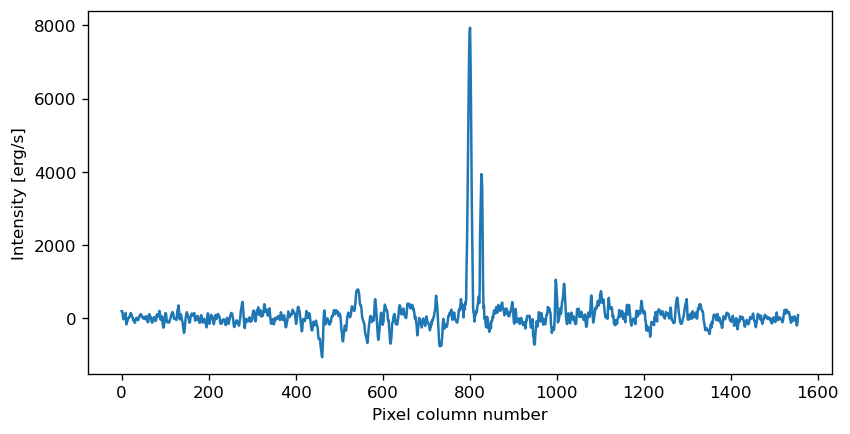

In [85]:
spectrum_final = spectra_background(spectra_back,16,33)

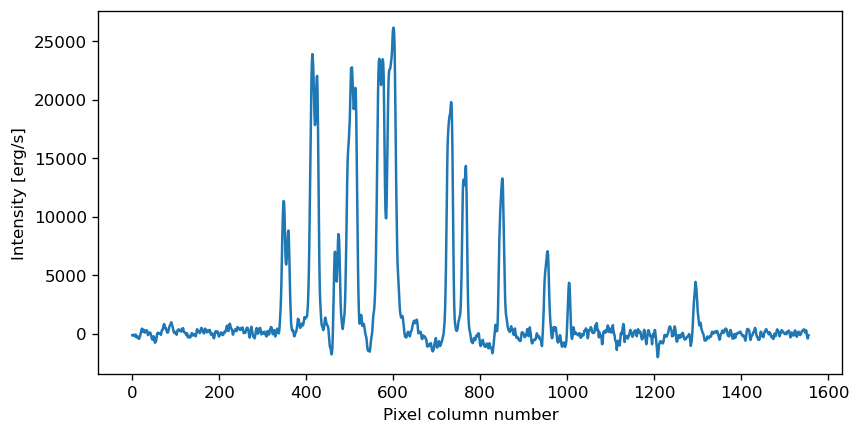

In [86]:
spectrum_final_lamp1 = spectra_background(lamp_1,10,47)
# plt.axhline(spectrum_final_lamp1.mean())

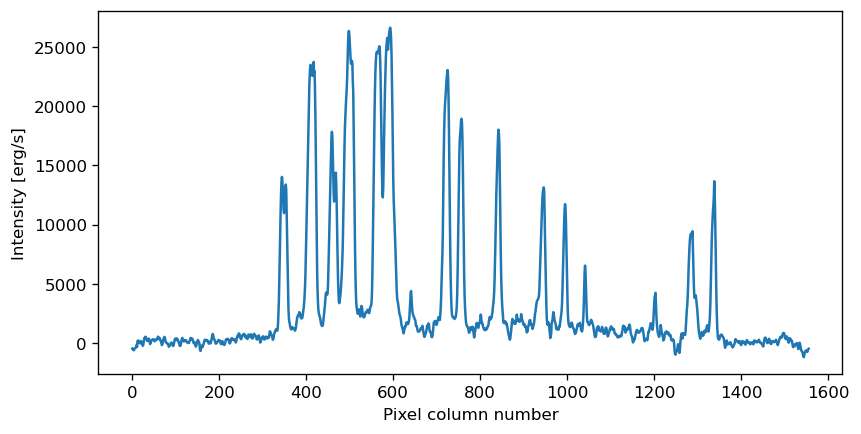

In [87]:
spectrum_final_lamp2 = spectra_background(lamp_2,5,41)
# plt.axhline(spectrum_final_lamp2.mean())

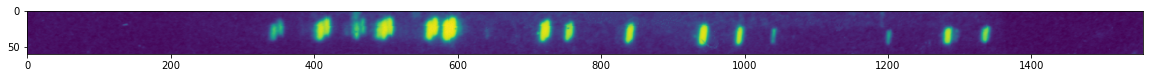

In [50]:
plt.figure(figsize=(20,10))
plt.imshow(lamp_2)

# WAVELENGTH

### $D = \frac{\lambda_n-\lambda_0}{N_n - N_0}$

D - средняя дисперсия, λn и λo – длины волн последней и первой линий в ангстремах, а  Nn и No –соответствующие номера

In [88]:
lambd_0 = 6217.28
lambd_n = 6929.47

In [18]:
def standart_deviation(list_value):
    mean = np.mean(list_value)
    summ = []
    for i in list_value:
        summ.append((i-mean)**2)
    std = np.sqrt(np.sum(summ)/len(list_value))
    return std

def x_axis_to_wavelenght(lamp_1,lamp_2):
    
    lamp_1_std = np.mean(lamp_1)#standart_deviation(lamp_1)*0.5
    
    index_l_1 = []
    
    for i in range(1,len(lamp_1)-1):
        if lamp_1[i] > lamp_1_std and lamp_1[i] > lamp_1[i+1] and lamp_1[i] > lamp_1[i-1]:
            index_l_1.append(i)
     
    dalta_ind_l1 = []
    for i in range(1,len(index_l_1)):
        dalta_ind_l1.append(index_l_1[i]-index_l_1[i-1])
    delta_std_l1 = standart_deviation(dalta_ind_l1)
    
    index_l1 = []
    counter_l1 = 0 
    for i in range(0,len(index_l_1)):
            
            if counter_l1 == 0:
                index_l1.append(index_l_1[i])
                countr_l1 =+ 1
           
            else:
                d = index_l_1[i] - index_l_1[i-1]
                countr_l1 =+ 1
                if d < delta_std_l1:
                    index_l1.append(index_l_1[i])  
    
    
    index_l1_1 = index_l1[0]
    index_l1_2 = index_l1[-1]
    
    lamp_2_std = np.mean(lamp_2)#standart_deviation(lamp_2)
    
    index_l_2 = []
    for i in range(1,len(lamp_2)-1):
        if lamp_2[i] > lamp_2_std and lamp_2[i] > lamp_2[i+1] and lamp_2[i] > lamp_2[i-1]:
            index_l_2.append(i)
            
        
    dalta_ind_l2 = []
    for i in range(1,len(index_l_2)):
        dalta_ind_l2.append(index_l_2[i]-index_l_2[i-1])
    delta_std_l2 = standart_deviation(dalta_ind_l2)
    
    index_l2 = []
    counter_l2 = 0 
    for i in range(0,len(index_l_2)):
            
            if counter_l2 == 0:
                index_l2.append(index_l_2[i])
                countr_l2 =+ 1
           
            else:
                d = index_l_2[i] - index_l_2[i-1]
                countr_l2 =+ 1
                if d < delta_std_l2:
                    index_l2.append(index_l_2[i])          
            
            
    index_l2_1 = index_l2[0]
    index_l2_2 = index_l2[-2]
    
    index_1 = int(np.mean([index_l1_1,index_l2_1]))
    index_2 = int(np.mean([index_l1_2,index_l2_2]))
    

    #PLOT
    fig,(ax1,ax2) = plt.subplots(2,figsize=(8,4),dpi=120)
#     ax1.figure(figsize=(18,9))
    ax1.plot(lamp_1,label="Lamp 1")
    ax1.axhline(lamp_1_std,c="gray",lw=1)
#     ax1.axhline(np.mean(lamp_1),c="black",lw=1)
    ax1.axvline(index_l1_1,c="r",lw=1)
    ax1.axvline(index_l1_2,c="r",lw=1)
    # ax1.scatter(index_l1_1, lamp_1[index_l1_1],c="r",s=83)
    # ax1.scatter(index_l1_2, lamp_1[index_l1_2],c="r",s=83)
    ax1.scatter(index_l1, lamp_1[index_l1],c="g")
#     ax1.set_title("Lamp 1")
    ax1.legend(loc=2)
    ax1.set_xlabel("Номер столбца пикселей")
    ax1.set_ylabel("Интенсивность\n[эрг/с]")
#     ax1.set_xlabel("Pixel column number")
#     ax1.set_ylabel("Intensity [erg/s]")
    
    ax2.plot(lamp_2,label="Lamp 2")
    ax2.axhline(lamp_2_std,c="gray",lw=1)
#     ax2.axhline(np.mean(lamp_2),c="black",lw=1)
    ax2.axvline(index_l2_1,c="r",lw=1)
    ax2.axvline(index_l2_2,c="r",lw=1)    
    # ax2.scatter(index_l2_1, lamp_2[index_l2_1],c="r",s=83)
    # ax2.scatter(index_l2_2, lamp_2[index_l2_2],c="r",s=83)    
    ax2.scatter(index_l2, lamp_2[index_l2],c="g")
#     ax2.set_title("Lamp 2")
    ax2.legend(loc=2)
    ax2.set_xlabel("Номер столбца пикселей")
    ax2.set_ylabel("Интенсивность\n[эрг/с]")    
#     ax2.set_xlabel("Pixel column number")
#     ax2.set_ylabel("Intensity [erg/s]")
#     plt.savefig("wavelenght_lamp.jpg")
    
    return index_1,index_2, index_l1,index_l2

In [92]:
def pixel2wavelenght(spectra,lambd_0,lambd_n,N_0,N_n):
    
    """
    Function calculates mean dispersion of wavelenghts
    and convert numbers of columns to wavelenght using lamp spectra.
    
    spectra -- final spectra of object/lamp without background (1-d array)
    lambd_0 -- the wavelengths of the first line of lamp spectra in angstroms 
    lambd_n -- the wavelengths of the last line of lamp spectra in angstroms
    N_0 -- column number of the first line
    N_n -- column number of the last line
    """
    dispersion = (lambd_n - lambd_0)/(N_n - N_0)
    wavelenght = []
    
    for i in range(0,len(spectra)):
        delta = i - N_0
        wl = delta * dispersion #distance in angstrom between a column and first line column
        wavelenght.append(lambd_0+wl)
        
        #PLOT
    plt.figure(figsize=(18,9))
    plt.plot(wavelenght,spectra)
    
    return wavelenght,dispersion

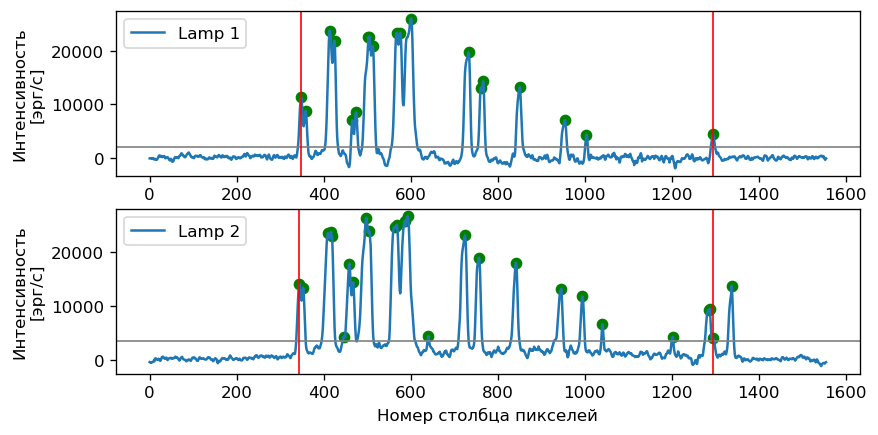

In [101]:
index_1,index_2,index_l1,index_l2 = x_axis_to_wavelenght(spectrum_final_lamp1,spectrum_final_lamp2)

In [55]:
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [56]:
np.array(index_l1)

array([ 348,  359,  414,  425,  466,  474,  503,  505,  513,  568,  576,
        601,  733,  762,  767,  851,  955, 1004, 1295])

In [57]:
np.array(index_l2)

array([ 344,  353,  410,  417,  419,  446,  459,  468,  498,  505,  563,
        568,  586,  593,  641,  725,  757,  842,  946,  995, 1041, 1203,
       1285, 1288, 1295, 1338])

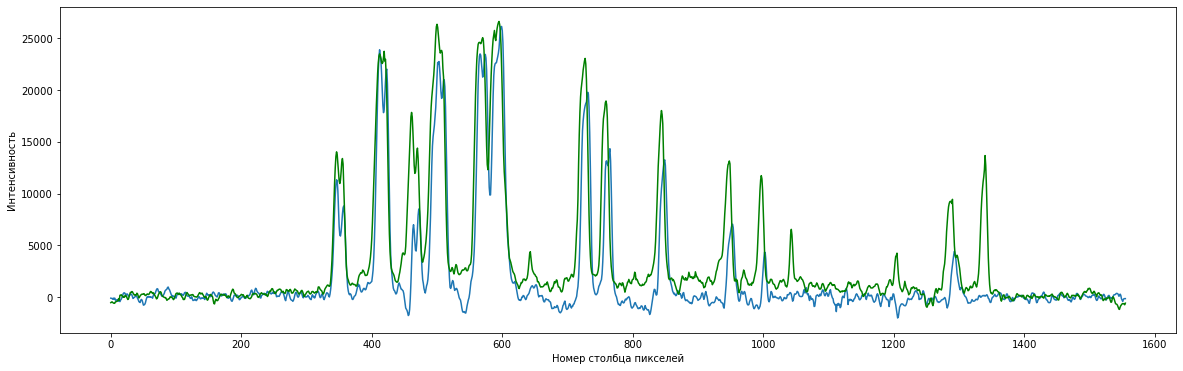

In [58]:
plt.figure(figsize=(20,6))
plt.plot(np.roll(spectrum_final_lamp1,-2),label="Лампа 1")
plt.plot(np.roll(spectrum_final_lamp2,2),c="g",label="Лампа 2")
plt.xlabel("Номер столбца пикселей")
plt.ylabel("Интенсивность")
plt.savefig("roll_lamps.jpg")

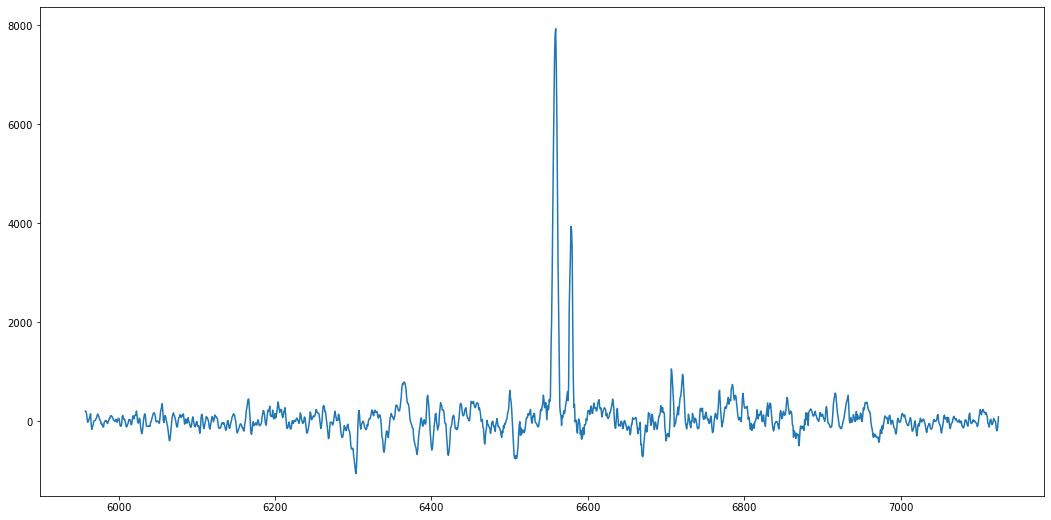

In [102]:
wavelenght,dispersion = pixel2wavelenght(spectrum_final,lambd_0,lambd_n,index_1,index_2)

In [103]:
dispersion

0.7504636459430986

In [120]:
def aprx(x,y,order):

    # monotone = False
        
    z = np.polyfit( x,y,order)
    p = np.poly1d(z)
    print(x)
    xp = np.linspace(x[0], x[-1], 1000)
#     print(xp)
    # print(xp)
    pxp = p(xp)
#     print(pxp)
    for i in range(1,len(pxp)):
        max_pxp = y[:-1].max()
        if pxp[i]<=pxp[i-1]:
            pxp[i]=pxp[i-1]+1
            if pxp[i]>=max_pxp:
                min_pxp = pxp[i-100]
                delta_pxp = abs((max_pxp - min_pxp)/(len(pxp)-i-1))
                index = i-10
                break


    for j in range(index+1,len(pxp)):
        pxp[j]=pxp[j-1]+delta_pxp
               
    fig, ax1 = plt.subplots(figsize=(6,4),dpi=120)
    ax1 = plt.scatter(x,y, color="blue",s=50) 
    ax1 = plt.plot(xp, p(xp), color="orange",lw=2,label=f"Полином ({order})")   
    plt.legend()
    plt.xlabel("Номер столбца пикселей")
#     plt.xlabel("Pixel column number")
    plt.ylabel("$\Delta \lambda [\AA]$ ")
#     plt.savefig("delta_lamd_polinomial.jpg")
    
    return xp,p

In [115]:
def func(index_1,index_2,x1,x2,x3,x4,x5,lambd_1,lambd_2,lambd_3,lambd_4,lambd_5,wavelenght):
    
    delta_lambd_1 = wavelenght[x1] - lambd_1 
    delta_lambd_2 = wavelenght[x2] - lambd_2 
    delta_lambd_3 = wavelenght[x3] - lambd_3 
    delta_lambd_4 = wavelenght[x4] - lambd_4 
    delta_lambd_5 = wavelenght[x5] - lambd_5 
    
    print(wavelenght[x2])
    
    corr = np.array([0,delta_lambd_1,delta_lambd_2,delta_lambd_3,delta_lambd_4,delta_lambd_5,0]) #0 in the begging and in the end because we exactly know wavelenght of index_1,index_2
    
    plt.figure(figsize=(6,4), dpi=120)
    plt.scatter([index_1,x1,x2,x3,x4,x5,index_2],corr,s=50)
    plt.xlabel("Номер столбца пикселей")
#     plt.xlabel("Pixel column number")
    plt.ylabel("$\Delta \lambda [\AA]$ ")
#     plt.savefig("delta_lamd.jpg")
    
    xpp, polinomial = aprx([index_1,x1,x2,x3,x4,x5,index_2],corr,3)

    columns = np.arange(0,len(wavelenght))
    
    correction_whole = np.array(polinomial(columns))
    
    wavelenght_corrected = wavelenght + correction_whole
    
    return wavelenght_corrected,polinomial

In [68]:
index_1

346

In [69]:
index_2

1295

6405.646375131718
[346, 412, 597, 729, 846, 950, 1295]


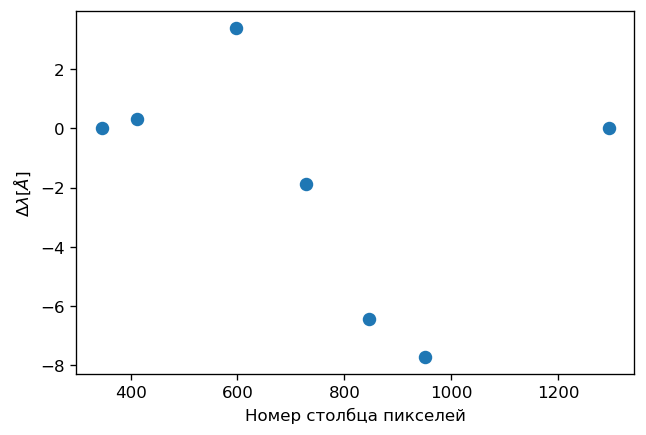

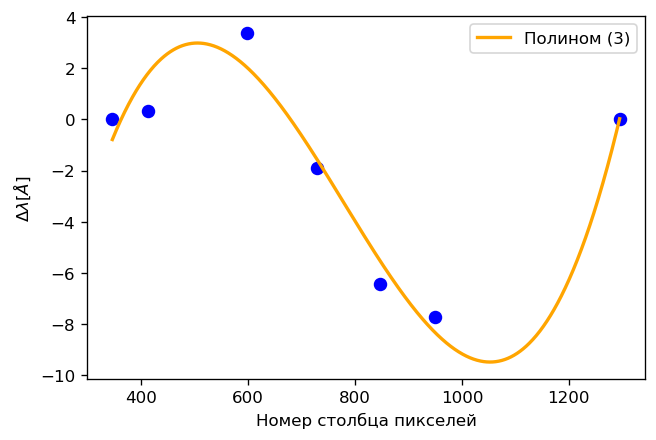

In [121]:
x1 = int(np.mean([414,410])) 
x2 = int(np.mean([601,593]))
x3 = int(np.mean([733,725]))
x4 = int(np.mean([851,842]))
x5 = int(np.mean([955,946]))
x6 = int(np.mean([1295,1288]))



lambd_1 = 6266.5
lambd_2 = 6402.25
lambd_3 = 6506.59
lambd_4 = 6598.95
lambd_5 = 6678.28
lambd_6 = 6929.47


wv,pp = func(index_1,index_2,x1,x2,x3,x4,x5,lambd_1,lambd_2,lambd_3,lambd_4,lambd_5,wavelenght)

In [86]:
pp(index_1)

-3.1176738730794824

Text(0, 0.5, 'Интенсивность [эрг/с]')

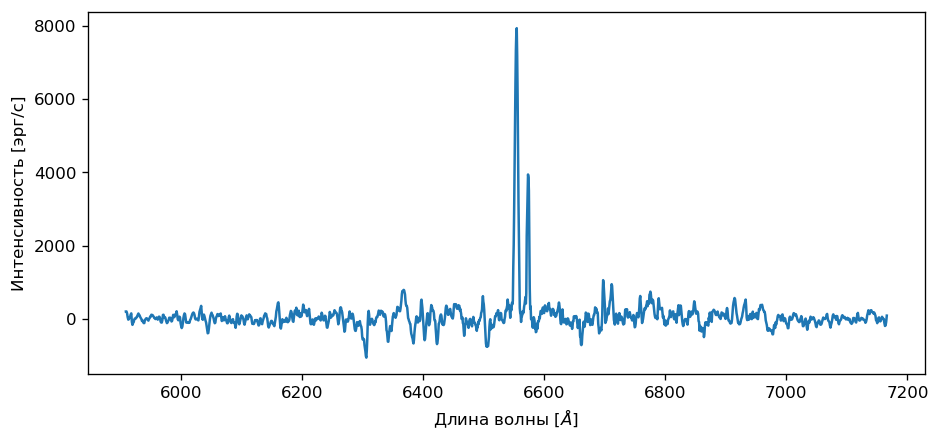

In [123]:
plt.figure(figsize=(9,4),dpi=120)
plt.plot(wv,spectrum_final)
plt.xlabel("Длина волны [$\AA$]")
plt.ylabel("Интенсивность [эрг/с]")
# plt.xlabel("Wavelength [$\AA$]")
# plt.ylabel("Intensity [erg/s]")
# plt.savefig("final_spectra.jpg")

In [63]:
np.argmax(spectrum_final)

801

In [83]:
wv[801] - 6562

-14.742348094201589

In [5]:

lamp_Halfa = io.imread(f'lamp_Halfa.png')
lamp_Halfa = color.rgb2gray(lamp_Halfa)

<ipython-input-5-bae71eca2769>:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  lamp_Halfa = color.rgb2gray(lamp_Halfa)


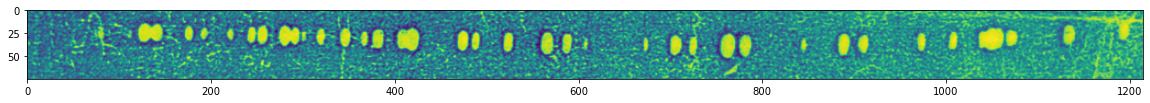

In [6]:
plt.figure(figsize = (20,16))
plt.imshow(lamp_Halfa[0:100])

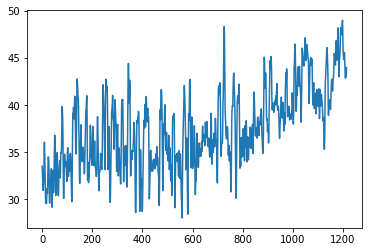

In [7]:
lam_a_1 = lamp_Halfa[0:100]
l_a_1 = lam_a_1.sum(axis = 0)
plt.plot(l_a_1)


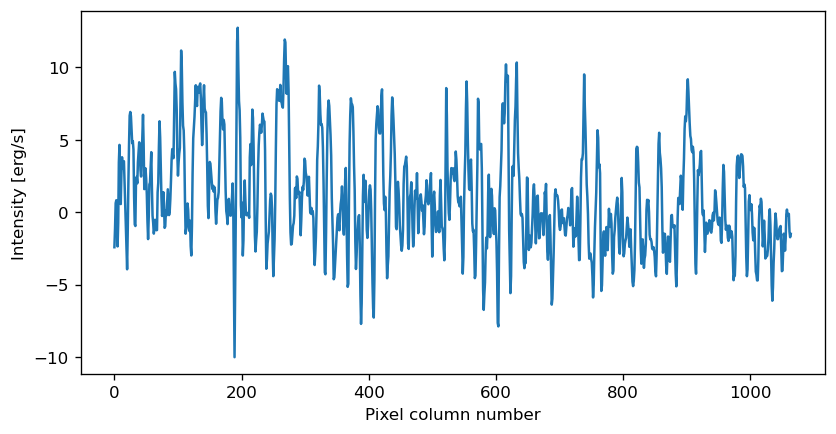

In [10]:
ss = spectra_background(lam_a_1[:,150:],18,70)

In [1]:
from scipy.signal import lfilter

In [2]:
n = 10  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,ss)

NameError: name 'ss' is not defined

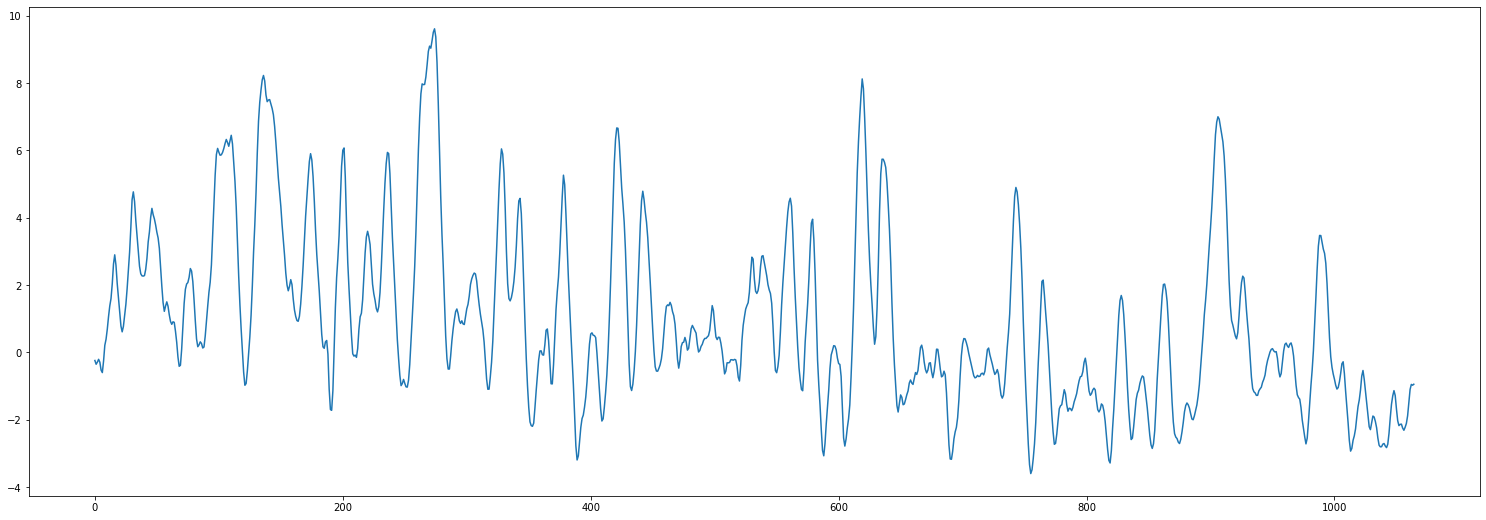

In [26]:
plt.figure(figsize=(26,9))
plt.plot(yy)

# plt.plot(spectrum_final_lamp2/2144.33,c="g")

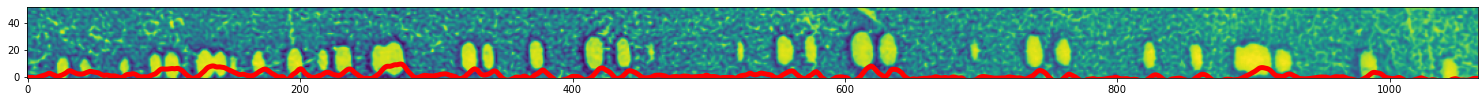

In [27]:
plt.figure(figsize=(26,9))
plt.plot(yy,c="r",lw=5)

plt.imshow(lamp_Halfa[18:70,150:])
plt.gca().invert_yaxis()

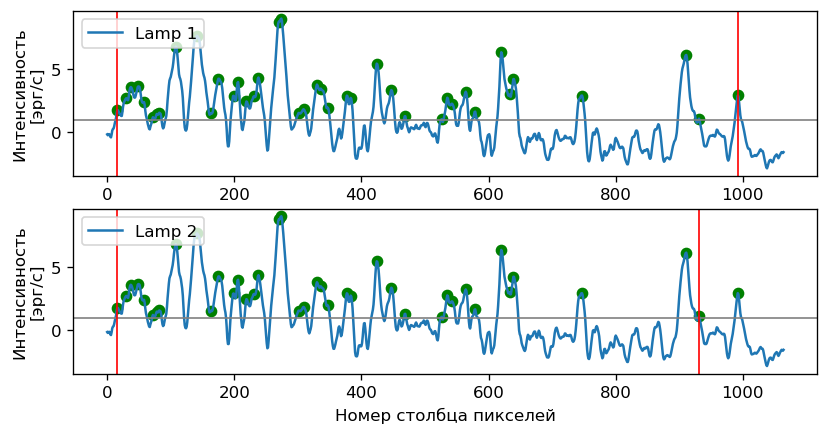

In [19]:
index_11,index_22,index_,index__ = x_axis_to_wavelenght(yy,yy)

In [20]:
len(index__)

41

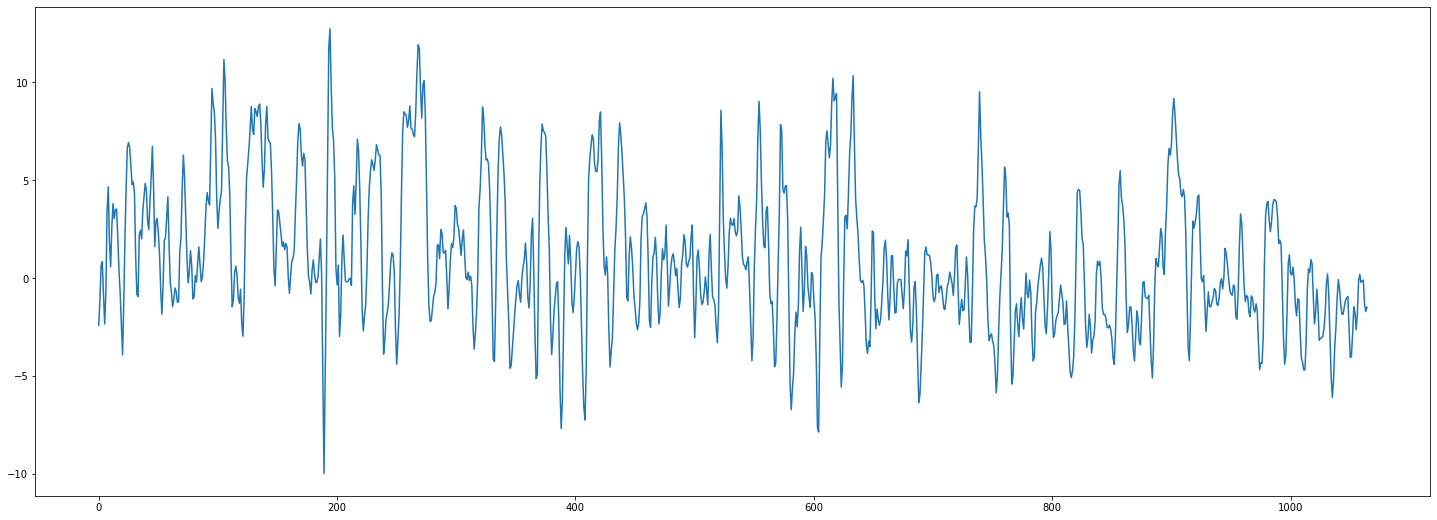

In [21]:

plt.figure(figsize=(25,9))
plt.plot(ss)